In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('carprices.csv')

In [3]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [4]:
from sklearn.preprocessing import LabelEncoder


In [5]:
column_names = df.columns
print(column_names)

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')


In [6]:
dummies=pd.get_dummies(df['Car Model'])

In [10]:
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [21]:
merged = pd.concat([df, dummies], axis='columns')


In [27]:
# Drop 'Car Model' and one dummy variable (e.g., 'Audi A5') to avoid multicollinearity
final = merged.drop(['Car Model', 'Audi A5'], axis='columns')

In [48]:
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,True,False
1,35000,34000,3,True,False
2,57000,26100,5,True,False
3,22500,40000,2,True,False
4,46000,31500,4,True,False
5,59000,29400,5,False,False
6,52000,32000,5,False,False
7,72000,19300,6,False,False
8,91000,12000,8,False,False
9,67000,22000,6,False,True


In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
model=LinearRegression()

In [37]:
x=final.drop('Sell Price($)',axis='columns')

In [41]:
y=final['Sell Price($)']

model.fit(x,y)

In [56]:
model.fit(x,y)

LinearRegression()

## Price of mercedez benz that is 4 yr old with mileage 45000

In [58]:
model.predict([[45000,4,0,1]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

## Price of BMW X5 that is 7 yr old with mileage 86000



In [69]:
model.predict([[86000,7,1,0]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

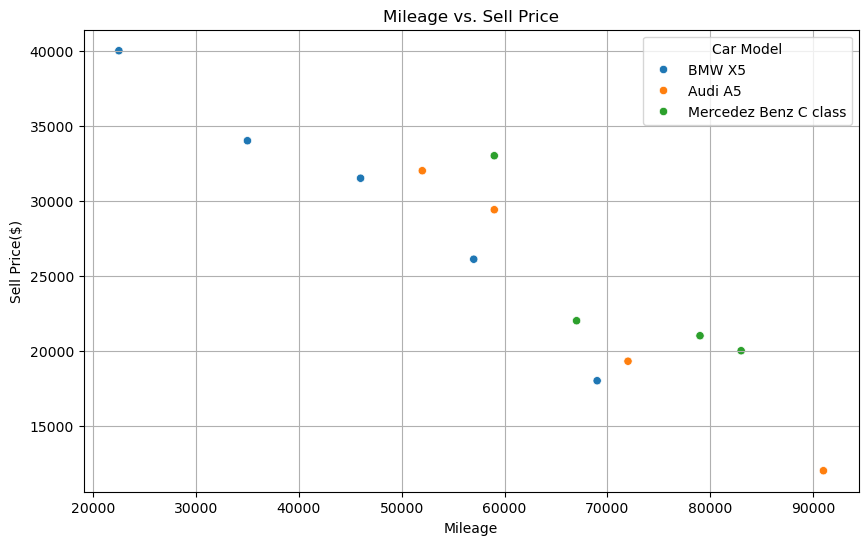

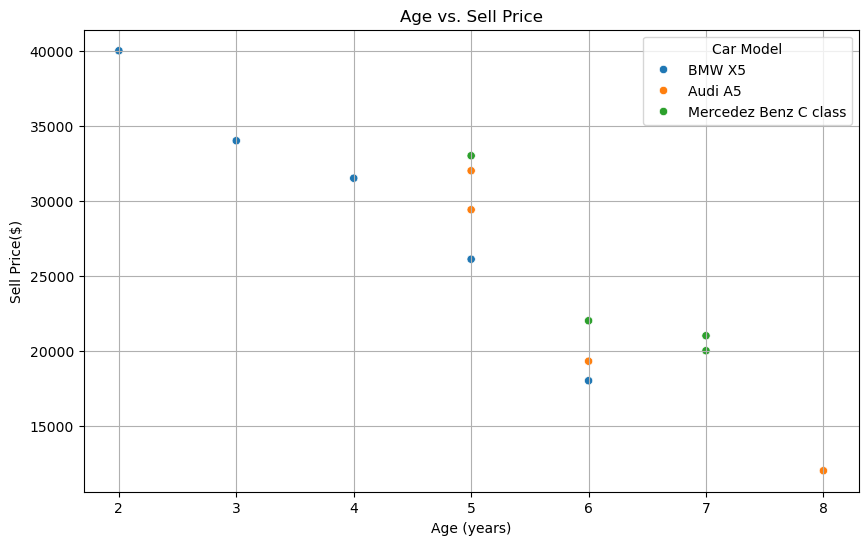

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Mileage vs. Sell Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Sell Price($)', hue='Car Model', data=df)
plt.title('Mileage vs. Sell Price')
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.grid(True)
plt.show()

# Plotting Age vs. Sell Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age(yrs)', y='Sell Price($)', hue='Car Model', data=df)
plt.title('Age vs. Sell Price')
plt.xlabel('Age (years)')
plt.ylabel('Sell Price($)')
plt.grid(True)
plt.show()


In [73]:
model.score(x,y)

0.9417050937281082